In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import random
import json
import cvxpy as cvx

from utils import plot_decomp
from solardatatools import signal_decompositions as sd
from sklearn.metrics import mean_absolute_error as mae

np.random.seed(12) 
random.seed(10)

In [2]:
cvxpy_solvers = ["MOSEK", "OSQP", "ECOS", "SCS"]
output_dict = {}

## `l2_l1d1_l2d2p365`

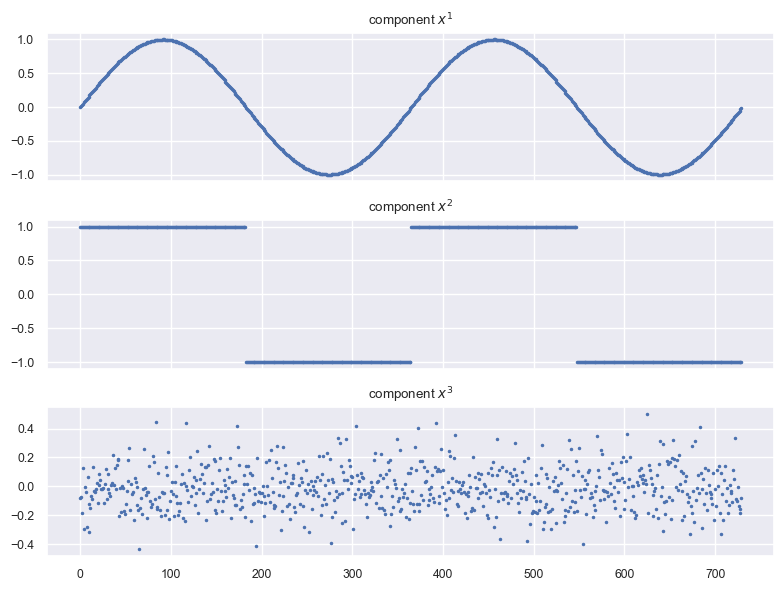

In [111]:
# Full length test signal used for this function l2_l1d1_l2d2p365
t = np.arange(365*2)

signal1 = np.sin(2 * np.pi * t * 1 / (365.))  
signal2 = signal.square(2 * np.pi * t * 1 / (365.)) 
signal3 = 0.15 * np.random.randn(len(signal1))

X_real = np.zeros((3, len(t)), dtype=float)
X_real[0] = signal1
X_real[1] = signal2
X_real[2] = signal3
y = np.sum(X_real, axis=0)

plot_decomp(X_real)

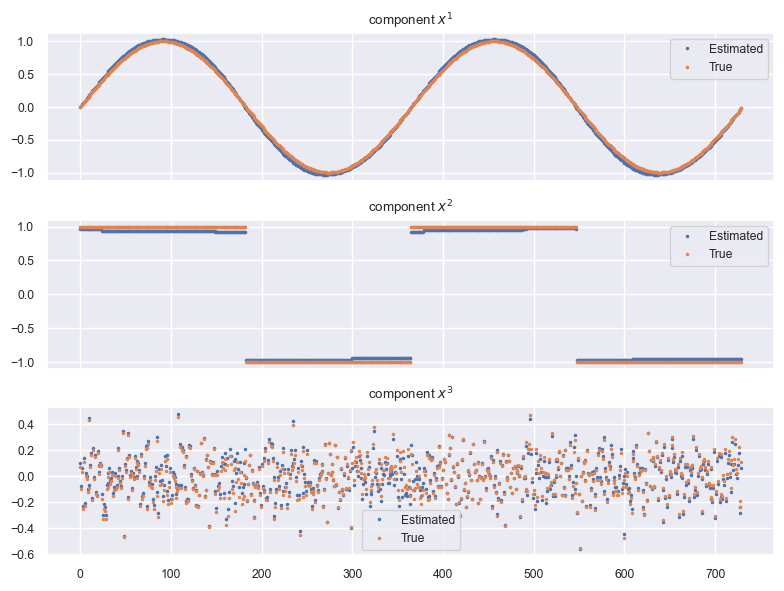

In [4]:
# MOSEK
solver = cvxpy_solvers[0]

s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(y, c1=2, solver=solver, return_obj=True)

output_dict[f"expected_s_hat_{solver}"] = list(s_hat)
output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas, s_hat, s_error], X_real)

In [122]:
# OSQP
solver = cvxpy_solvers[1]

s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(y, c1=2, solver=solver, return_obj=True)

output_dict[f"expected_s_hat_{solver}"] = list(s_hat)
output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas, s_hat, s_error], X_real)

SolverError: Problem could not be reduced to a QP, and no conic solvers exist among candidate solvers ({'qp_solvers': ['OSQP'], 'conic_solvers': []}).

/Users/smiskov/opt/anaconda3/envs/pvi-env/lib/python3.10/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


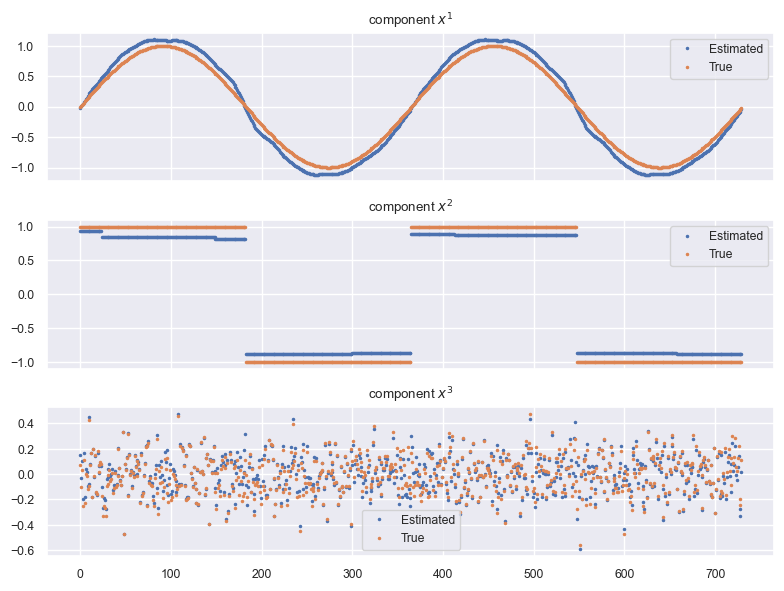

In [6]:
# ECOS
solver = cvxpy_solvers[2]

s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(y, c1=2, solver=solver, return_obj=True)

output_dict[f"expected_s_hat_{solver}"] = list(s_hat)
output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas, s_hat, s_error], X_real)

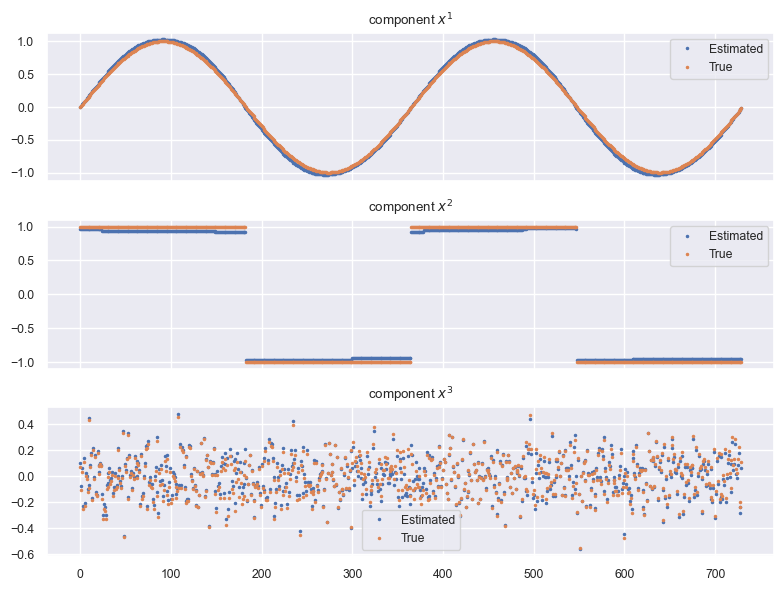

In [7]:
# SCS
solver = cvxpy_solvers[3]

s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(y, c1=2, solver=solver, return_obj=True)

output_dict[f"expected_s_hat_{solver}"] = list(s_hat)
output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas, s_hat, s_error], X_real)

In [ ]:
# with open("test_l2_l1d1_l2d2p365_default_cvxpy_comparison.json", "w") as outfile:
#     json.dump(output_dict, outfile)

In [17]:
print(f'Objective with SCS   {output_dict["expected_obj_val_SCS"]:.2f}')
print(f'Objective with ECOS  {output_dict["expected_obj_val_ECOS"]:.2f}')
print(f'Objective with MOSEK {output_dict["expected_obj_val_MOSEK"]:.2f}')

Objective with SCS   55.03
Objective with ECOS  58.48
Objective with MOSEK 55.03


In [22]:
print(f's_hat MAE MOSEK/SCS   {mae(output_dict["expected_s_hat_MOSEK"], output_dict["expected_s_hat_SCS"]):.2e}')
print(f's_seas MAE MOSEK/SCS  {mae(output_dict["expected_s_seas_MOSEK"], output_dict["expected_s_seas_SCS"]):.2e}\n')
print(f's_hat MAE MOSEK/ECOS  {mae(output_dict["expected_s_hat_MOSEK"], output_dict["expected_s_hat_ECOS"]):.2e}')
print(f's_seas MAE MOSEK/ECOS {mae(output_dict["expected_s_seas_MOSEK"], output_dict["expected_s_seas_ECOS"]):.2e}')

s_hat MAE MOSEK/SCS   5.84e-05
s_seas MAE MOSEK/SCS  6.77e-05

s_hat MAE MOSEK/ECOS  8.30e-02
s_seas MAE MOSEK/ECOS 8.33e-02


- Error is between ~1e-5 and ~1e-2
- Set to 1e-3 for example (in between worst and best case)

## `l1_l2d2p365`

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import random
import json

from utils import plot_decomp, plot_signal
from solardatatools import signal_decompositions as sd

np.random.seed(12) 
random.seed(10)

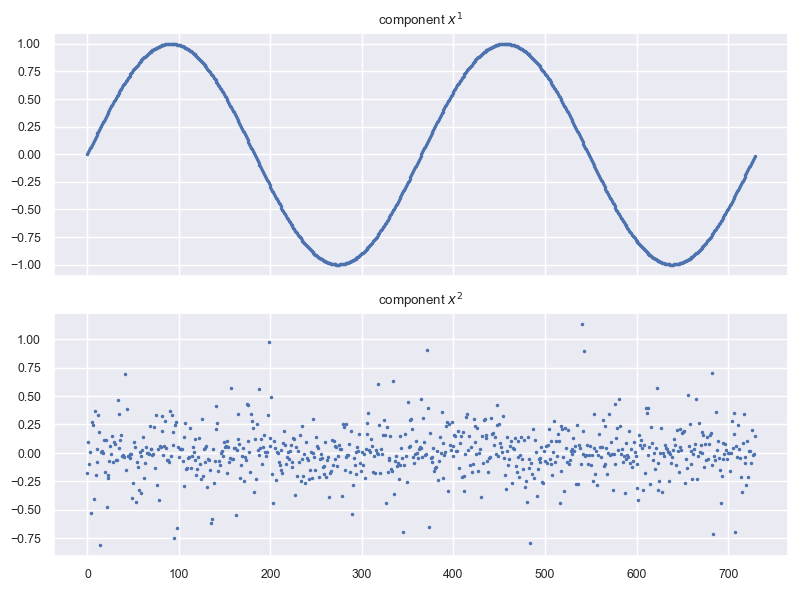

In [24]:
t = np.arange(365*2)

# seasonal periodic
signal1 = np.sin(2 * np.pi * t * 1 / (365.))
X_real = np.zeros((2, len(t)), dtype=float)
# laplacian noise
signal2 = 0.15 * np.random.laplace(0, 1, len(signal1))

X_real[0] = signal1
X_real[1] = signal2

y = np.sum(X_real, axis=0)

plot_decomp(X_real)


- check on a couple more problems 

SUMMARY
- design threshold for asserting equal to be Less strict than the one we want passed and more strict than the one we would have fail.
- probably does not need fine tuning for each problem, but do a couple more for a sanity check to make sure this number makes sense
- need to also check OSD

NEXT:
- make OSD equivalent of fns
- pass data from OSD to CVX to compare objectives ----> report if large difference, need to investigate why

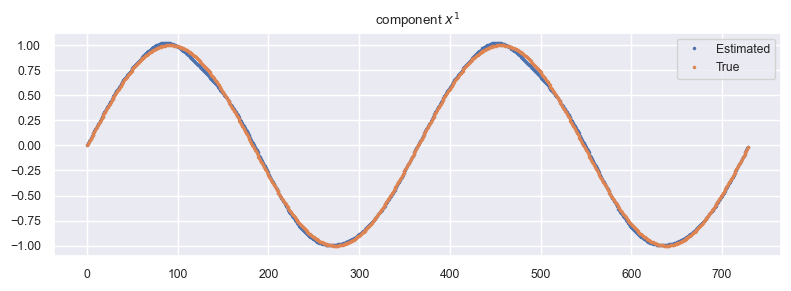

In [30]:
# MOSEK
solver = cvxpy_solvers[0]

s_seas, obj_val = sd.l1_l2d2p365(y, solver=solver, return_obj=True)

output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas], X_real)

In [31]:
# OSQP
solver = cvxpy_solvers[1]

s_seas, obj_val = sd.l1_l2d2p365(y, solver=solver, return_obj=True)

output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas], X_real)

SolverError: Problem could not be reduced to a QP, and no conic solvers exist among candidate solvers ({'qp_solvers': ['OSQP'], 'conic_solvers': []}).

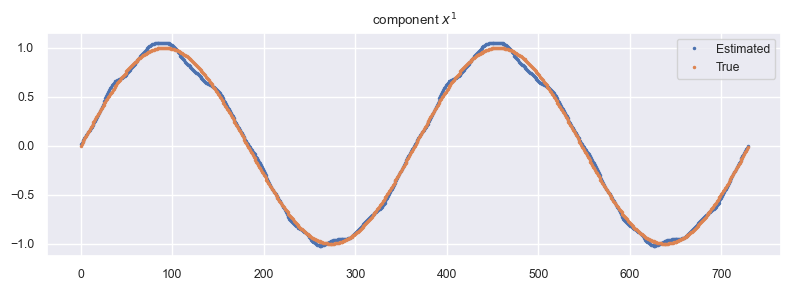

In [32]:
# ECOS
solver = cvxpy_solvers[2]

s_seas, obj_val = sd.l1_l2d2p365(y, solver=solver, return_obj=True)

output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas], X_real)

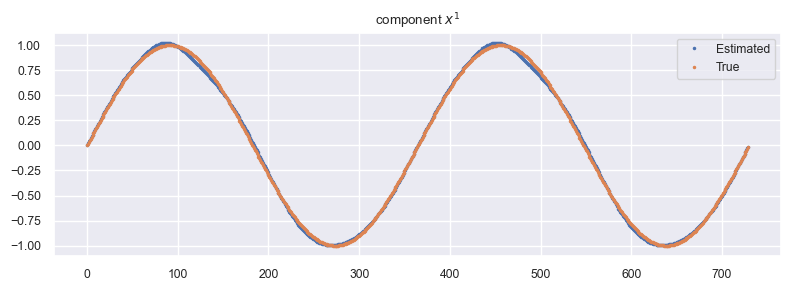

In [34]:
# SCS
solver = cvxpy_solvers[3]

s_seas, obj_val = sd.l1_l2d2p365(y, solver=solver, return_obj=True)

output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas], X_real)

In [35]:
print(f'Objective with SCS   {output_dict["expected_obj_val_SCS"]:.2f}')
print(f'Objective with ECOS  {output_dict["expected_obj_val_ECOS"]:.2f}')
print(f'Objective with MOSEK {output_dict["expected_obj_val_MOSEK"]:.2f}')

Objective with SCS   114.35
Objective with ECOS  124.56
Objective with MOSEK 114.35


In [58]:
print(f's_seas MAE MOSEK/SCS  {mae(output_dict["expected_s_seas_MOSEK"], output_dict["expected_s_seas_SCS"]):.2e}')
print(f's_seas MAE MOSEK/ECOS {mae(output_dict["expected_s_seas_MOSEK"], output_dict["expected_s_seas_ECOS"]):.2e}')

s_seas MAE MOSEK/SCS  3.05e-04
s_seas MAE MOSEK/ECOS 1.24e-02


- 1e-3 is appropriate here as well. 

## `tl1_l2d2p365`

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.stats import laplace_asymmetric
import random
import json

from utils import plot_decomp, plot_signal
from solardatatools import signal_decompositions as sd

np.random.seed(12) 
random.seed(10)

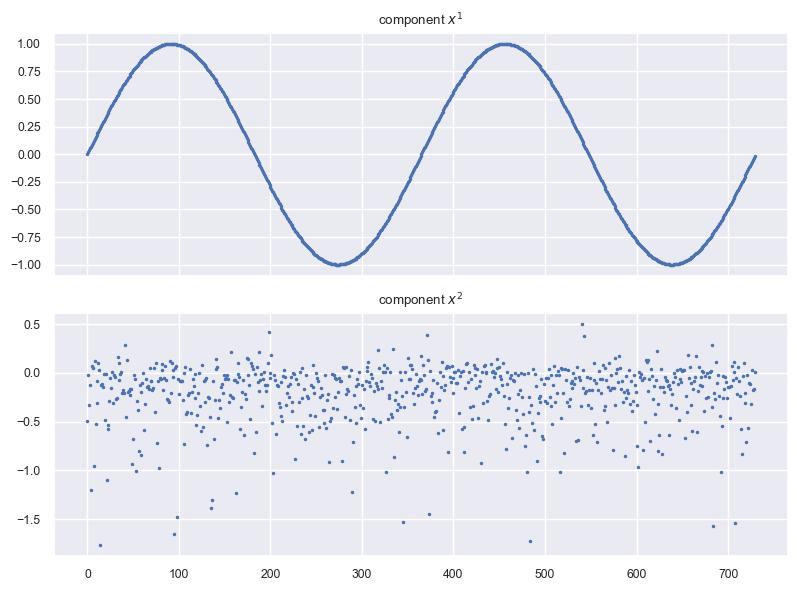

In [132]:
t = np.arange(365*2)

# seasonal periodic
signal1 = np.sin(2 * np.pi * t * 1 / (365.))
# asymmetric laplacian noise
kappa = 2 # k>0, k=1 is laplace
signal2 = 0.15 * laplace_asymmetric.rvs(kappa, size=len(signal1))

X_real = np.zeros((2, len(t)), dtype=float)
X_real[0] = signal1
X_real[1] = signal2

y = np.sum(X_real, axis=0)
plot_decomp(X_real)

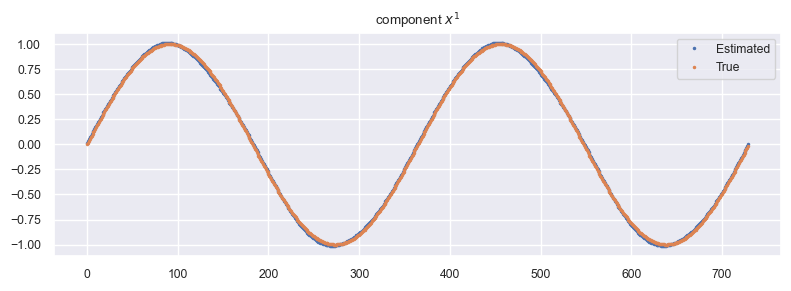

In [133]:
# MOSEK
solver = cvxpy_solvers[0]

s_seas, obj_val = sd.tl1_l2d2p365(y, solver=solver, tau=0.8, return_obj=True)

output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas], X_real)

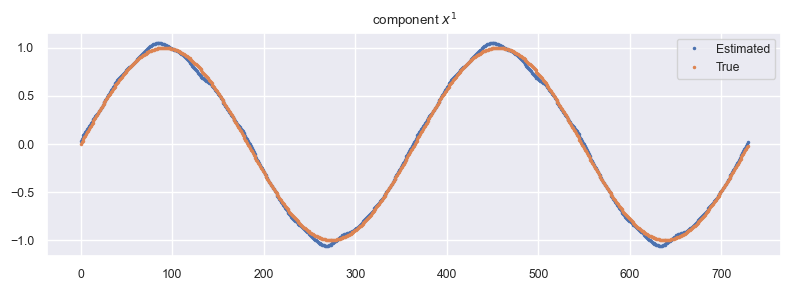

In [134]:
# ECOS
solver = cvxpy_solvers[2]

s_seas, obj_val = sd.tl1_l2d2p365(y, solver=solver, tau=0.8, return_obj=True)

output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas], X_real)

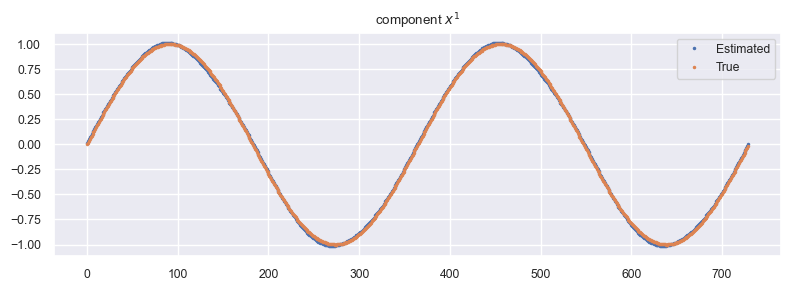

In [135]:
# SCS
solver = cvxpy_solvers[3]

s_seas, obj_val = sd.tl1_l2d2p365(y, solver=solver, tau=0.8, return_obj=True)

output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas], X_real)

In [136]:
print(f'Objective with SCS   {output_dict["expected_obj_val_SCS"]:.2f}')
print(f'Objective with ECOS  {output_dict["expected_obj_val_ECOS"]:.2f}')
print(f'Objective with MOSEK {output_dict["expected_obj_val_MOSEK"]:.2f}')

Objective with SCS   49.03
Objective with ECOS  53.97
Objective with MOSEK 49.02


In [137]:
print(f's_seas MAE MOSEK/SCS  {mae(output_dict["expected_s_seas_MOSEK"], output_dict["expected_s_seas_SCS"]):.2e}')
print(f's_seas MAE MOSEK/ECOS {mae(output_dict["expected_s_seas_MOSEK"], output_dict["expected_s_seas_ECOS"]):.2e}')

s_seas MAE MOSEK/SCS  3.05e-04
s_seas MAE MOSEK/ECOS 1.24e-02


- 1e-3 also works here

## `tl1_l1d1_l2d2p365`

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.stats import laplace_asymmetric
import random
import json

from utils import plot_decomp, plot_signal
from solardatatools import signal_decompositions as sd

np.random.seed(12) 
random.seed(10)

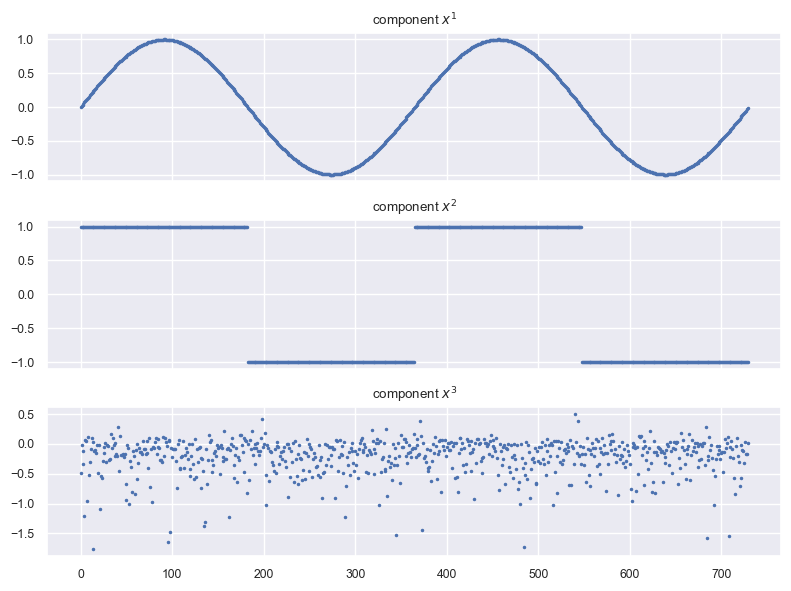

In [5]:
t = np.arange(365*2)

# seasonal term
signal1 = np.sin(2 * np.pi * t * 1 / (365.))
# piecewise constant term
signal2 = signal.square(2 * np.pi * t * 1 / (365.))
# asymmetric laplace noise 
kappa = 2 # k>0, k=1 is laplace
signal3 = 0.15 * laplace_asymmetric.rvs(kappa, size=len(signal1))

X_real = np.zeros((3, len(t)), dtype=float)
X_real[0] = signal1
X_real[1] = signal2
X_real[2] = signal3
y = np.sum(X_real, axis=0)

plot_decomp(X_real)

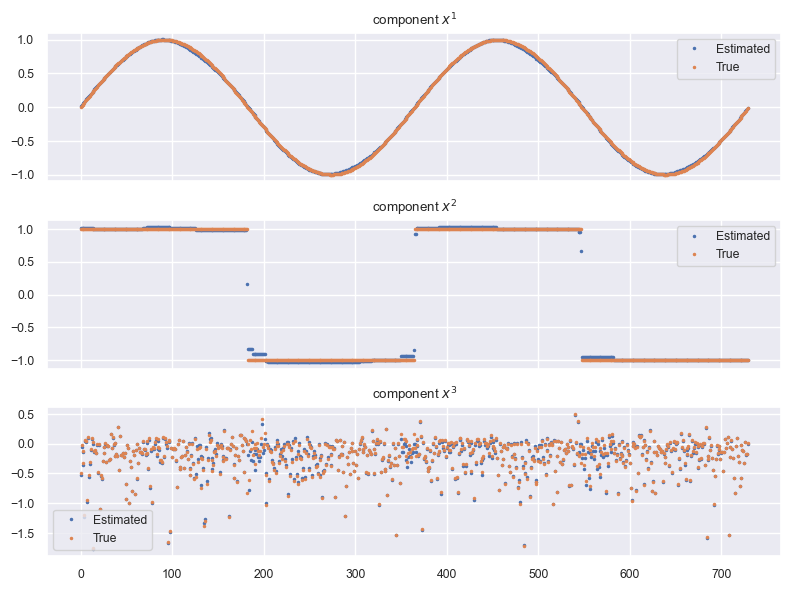

In [8]:
# MOSEK
solver = cvxpy_solvers[0]

s_hat, s_seas, s_error, _, obj_val = sd.tl1_l1d1_l2d2p365(y, tau=0.8, c1=4, c2=1200, c3=100, solver=solver, return_obj=True)
#s_hat, s_seas, _, _, obj_val = sd.tl1_l1d1_l2d2p365(y, tau=0.8, c1=5, c2=500, c3=100,  solver=solver, return_obj=True)


output_dict[f"expected_s_hat_{solver}"] = list(s_hat)
output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas, s_hat, s_error], X_real)

### Had to adjust c1 and c2 for ECOS to not fail

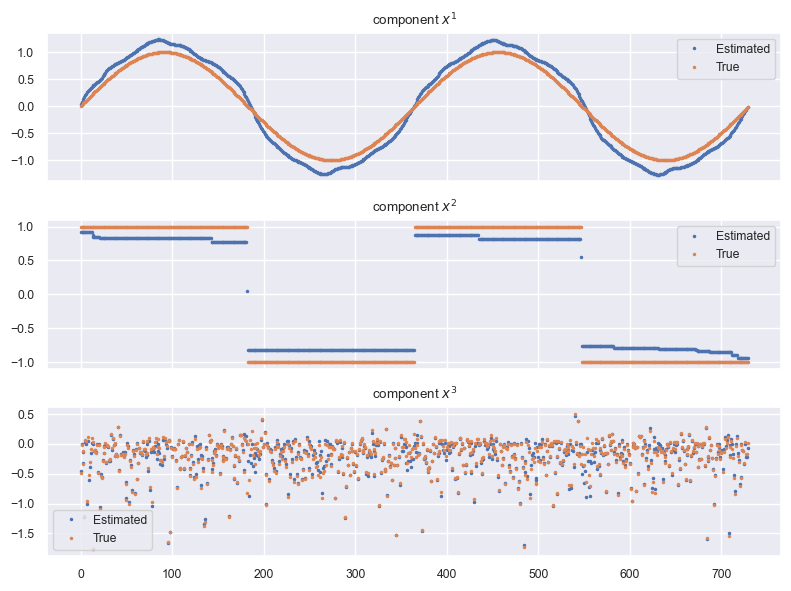

In [15]:
# ECOS
solver = cvxpy_solvers[2] 

s_hat, s_seas, s_error, _, obj_val = sd.tl1_l1d1_l2d2p365(y, tau=0.8, c1=4, c2=900, c3=100, solver=solver, return_obj=True)

output_dict[f"expected_s_hat_{solver}"] = list(s_hat)
output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas, s_hat, s_error], X_real)

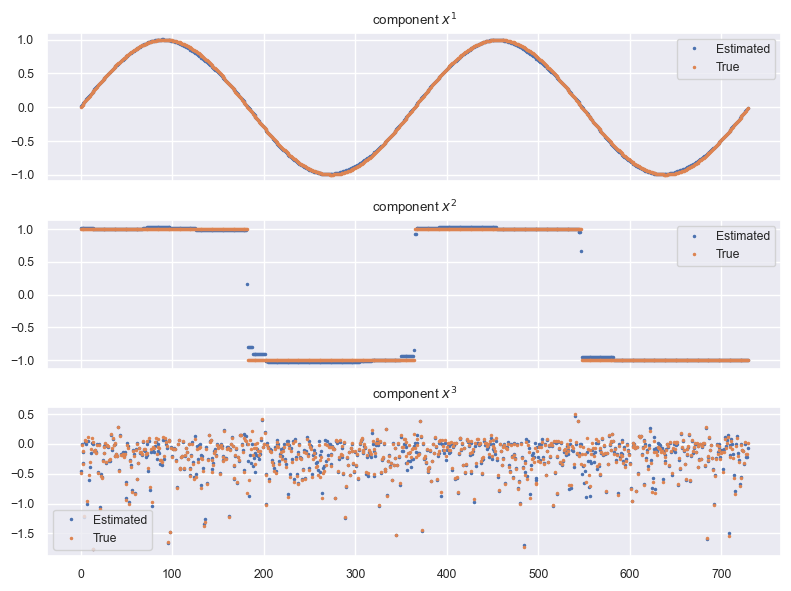

In [18]:
# SCS
solver = cvxpy_solvers[3]

s_hat, s_seas, _, _, obj_val = sd.tl1_l1d1_l2d2p365(y, tau=0.8, c1=4, c2=1200, c3=100, solver=solver, return_obj=True)

output_dict[f"expected_s_hat_{solver}"] = list(s_hat)
output_dict[f"expected_s_seas_{solver}"] =  list(s_seas)
output_dict[f"expected_obj_val_{solver}"] = obj_val

plot_decomp([s_seas, s_hat, s_error], X_real)

In [20]:
print(f'Objective with SCS   {output_dict["expected_obj_val_SCS"]:.2f}')
print(f'Objective with ECOS   {output_dict["expected_obj_val_ECOS"]:.2f}')
print(f'Objective with MOSEK {output_dict["expected_obj_val_MOSEK"]:.2f}')

Objective with SCS   116.04
Objective with ECOS   127.58
Objective with MOSEK 116.03


In [21]:
print(f's_hat MAE MOSEK/SCS   {mae(output_dict["expected_s_hat_MOSEK"], output_dict["expected_s_hat_SCS"]):.2e}')
print(f's_seas MAE MOSEK/SCS  {mae(output_dict["expected_s_seas_MOSEK"], output_dict["expected_s_seas_SCS"]):.2e}\n')

print(f's_hat MAE MOSEK/ECOS  {mae(output_dict["expected_s_hat_MOSEK"], output_dict["expected_s_hat_ECOS"]):.2e}')
print(f's_seas MAE MOSEK/ECOS {mae(output_dict["expected_s_seas_MOSEK"], output_dict["expected_s_seas_ECOS"]):.2e}')

s_hat MAE MOSEK/SCS   7.83e-04
s_seas MAE MOSEK/SCS  5.86e-04

s_hat MAE MOSEK/ECOS  1.74e-01
s_seas MAE MOSEK/ECOS 1.77e-01


- looks like here 1e-3 is good too.